# International football results from 1872 to 2019

## Context

Well, what happened was that I was looking for a semi-definite easy-to-read list of international football matches and couldn't find anything decent. So I took it upon myself to collect it for my own use. I might as well share it.

## Content

This dataset includes 40,838 results of international football matches starting from the very first official match in 1972 up to 2019. The matches range from FIFA World Cup to FIFI Wild Cup to regular friendly matches. The matches are strictly men's full internationals and the data does not include Olympic Games or matches where at least one of the teams was the nation's B-team, U-23 or a league select team.

'results.csv' includes the following columns:

1. date - date of the match
2. home_team - the name of the home team
3. away_team - the name of the away team
4. home_score - full-time home team score including extra time, not including penalty-shootouts
5. away_score - full-time away team score including extra time, not including penalty-shootouts
6. tournament - the name of the tournament
7. city - the name of the city/town/administrative unit where the match was played
8. country - the name of the country where the match was played
9. neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue


Note on team and country names: For home and away teams the current name of the team has been used. For example, when in 1882 a team who called themselves Ireland played against England, in this dataset, it is called Northern Ireland because the current team of Northern Ireland is the successor of the 1882 Ireland team. This is done so it is easier to track the history and statistics of teams.

For country names, the name of the country at the time of the match is used. So when Ghana played in Accra, Gold Coast in the 1950s, even though the names of the home team and the country don't match, it was a home match for Ghana. This is indicated by the neutral column, which says FALSE for those matches, meaning it was not at a neutral venue.

## Acknowledgements

The data is gathered from several sources including but not limited to Wikipedia, fifa.com, rsssf.com and individual football associations' websites.

## Inspiration

Some directions to take when exploring the data:

1. Who is the best team of all time
2. Which teams dominated different eras of football
3. What trends have there been in international football throughout the ages - home advantage, total goals scored, distribution of teams' strength etc
4. Can we say anything about geopolitics from football fixtures - how has the number of countries changed, which teams like to play each other
5. Which countries host the most matches where they themselves are not participating in
6. How much, if at all, does hosting a major tournament help a country's chances in the tournament
7. Which teams are the most active in playing friendlies and friendly tournaments - does it help or hurt them

The world's your oyster, my friend.

# Stage 1 - Import the Dataset and Libraries:

## Import Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset:

In [2]:
path_directory = '/Users/y.s.lee/OneDrive/MSc Data Science/Semester 3/Data VIsualisation NEW (COMP5048)/Assignments/Assignment 2/Data/'

data_football = pd.read_csv(path_directory + 'results.csv')

# Stage 2 - Review the Dataset:

In [3]:
data_football.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [4]:
data_football.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [5]:
data_football.shape

(40839, 9)

In [6]:
data_football.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
date          40839 non-null object
home_team     40839 non-null object
away_team     40839 non-null object
home_score    40839 non-null int64
away_score    40839 non-null int64
tournament    40839 non-null object
city          40839 non-null object
country       40839 non-null object
neutral       40839 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


# Stage 3 - Clean the Dataset:

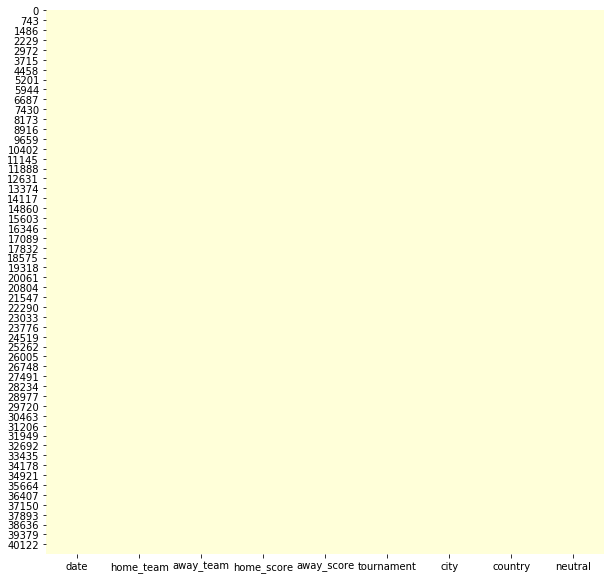

In [7]:
# Visualise it:

plt.figure(figsize=(10,10))
sns.heatmap(data_football.isnull(), cbar = False, cmap = "YlGnBu")

From the figure above, it seems like the dataset is complete and does not have missing data.

# Task 1 Analysis - Understand ranking of teams based on results from various competitions

For this task, the idea is to determine the outcome of each matches between the home and away teams, where the wining team will gain a score in points towards their ranking. The cumulative frequency of wining matches by each team will then determine its position on a ranking (leadership) board. The scores can be taken as three categories, winning the match, losing the match, and having a draw. However, this ranking/leadership board is non-conventional as it only takes into accounts of wining scores from matches played by each team. The ranking board should convey which teams has accumulated the most wins over time.


## THE FOLLOWING IS BASED AROUND THE 'HOME TEAM'

## Remove 'Friendly' matches:

In [8]:
data_football = data_football[data_football.tournament != 'Friendly']

In [9]:
data_football.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
29,1884-01-26,Northern Ireland,Scotland,0,5,British Championship,Belfast,Republic of Ireland,False
30,1884-02-09,Wales,Northern Ireland,6,0,British Championship,Wrexham,Wales,False
31,1884-02-23,Northern Ireland,England,1,8,British Championship,Belfast,Republic of Ireland,False
32,1884-03-15,Scotland,England,1,0,British Championship,Glasgow,Scotland,False
33,1884-03-17,Wales,England,0,4,British Championship,Wrexham,Wales,False


In [10]:
data_football.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [11]:
data_football.shape

(23928, 9)

## Checkout or List the unique tournaments:

In [12]:
data_football.tournament.unique()

array(['British Championship', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Copa Roca', 'Copa América', 'Copa Chevallier Boutell',
       'Nordic Championship', 'International Cup', 'Baltic Cup',
       'Balkan Cup', 'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'CCCF Championship',
       'NAFU Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'CONCACAF Championship',
       'Copa Juan Pinto Durán', 'UAFA Cup', 'South Pacific Games',
       'CONCACAF Championship qualification', 'Copa Ar

In [13]:
data_football.tournament.value_counts()

FIFA World Cup qualification            7100
UEFA Euro qualification                 2432
African Cup of Nations qualification    1616
FIFA World Cup                           900
Copa América                             813
AFC Asian Cup qualification              724
African Cup of Nations                   690
CECAFA Cup                               620
CFU Caribbean Cup qualification          606
Merdeka Tournament                       503
British Championship                     501
AFC Asian Cup                            370
Island Games                             350
Gulf Cup                                 333
Gold Cup                                 327
AFF Championship                         293
COSAFA Cup                               292
UEFA Euro                                286
Nordic Championship                      283
African Nations Championship             268
CFU Caribbean Cup                        251
Amílcar Cabral Cup                       235
King's Cup

## Visualise the popularity of the tournaments:

In [14]:
data_football_tournamentCount = data_football.tournament.value_counts().to_frame().reset_index().rename(columns={'tournament': 'count', 'index': 'tournament'})

In [15]:
data_football_tournamentCount

,tournament,count
0,FIFA World Cup qualification,7100
1,UEFA Euro qualification,2432
2,African Cup of Nations qualification,1616
3,FIFA World Cup,900
4,Copa América,813
5,AFC Asian Cup qualification,724
6,African Cup of Nations,690
7,CECAFA Cup,620
8,CFU Caribbean Cup qualification,606
9,Merdeka Tournament,503


In [16]:
print('The number of Tournaments are =', len(data_football_tournamentCount))

The number of Tournaments are = 108


[Text(0, 0, 'FIFA World Cup qualification'),
 Text(0, 0, 'UEFA Euro qualification'),
 Text(0, 0, 'African Cup of Nations qualification'),
 Text(0, 0, 'FIFA World Cup'),
 Text(0, 0, 'Copa América'),
 Text(0, 0, 'AFC Asian Cup qualification'),
 Text(0, 0, 'African Cup of Nations'),
 Text(0, 0, 'CECAFA Cup'),
 Text(0, 0, 'CFU Caribbean Cup qualification'),
 Text(0, 0, 'Merdeka Tournament'),
 Text(0, 0, 'British Championship'),
 Text(0, 0, 'AFC Asian Cup'),
 Text(0, 0, 'Island Games'),
 Text(0, 0, 'Gulf Cup'),
 Text(0, 0, 'Gold Cup'),
 Text(0, 0, 'AFF Championship'),
 Text(0, 0, 'COSAFA Cup'),
 Text(0, 0, 'UEFA Euro'),
 Text(0, 0, 'Nordic Championship'),
 Text(0, 0, 'African Nations Championship'),
 Text(0, 0, 'CFU Caribbean Cup'),
 Text(0, 0, 'Amílcar Cabral Cup'),
 Text(0, 0, "King's Cup"),
 Text(0, 0, 'South Pacific Games'),
 Text(0, 0, 'UNCAF Cup'),
 Text(0, 0, 'Korea Cup'),
 Text(0, 0, 'UEFA Nations League'),
 Text(0, 0, 'Confederations Cup'),
 Text(0, 0, 'SAFF Cup'),
 Text(0, 0, 'Int

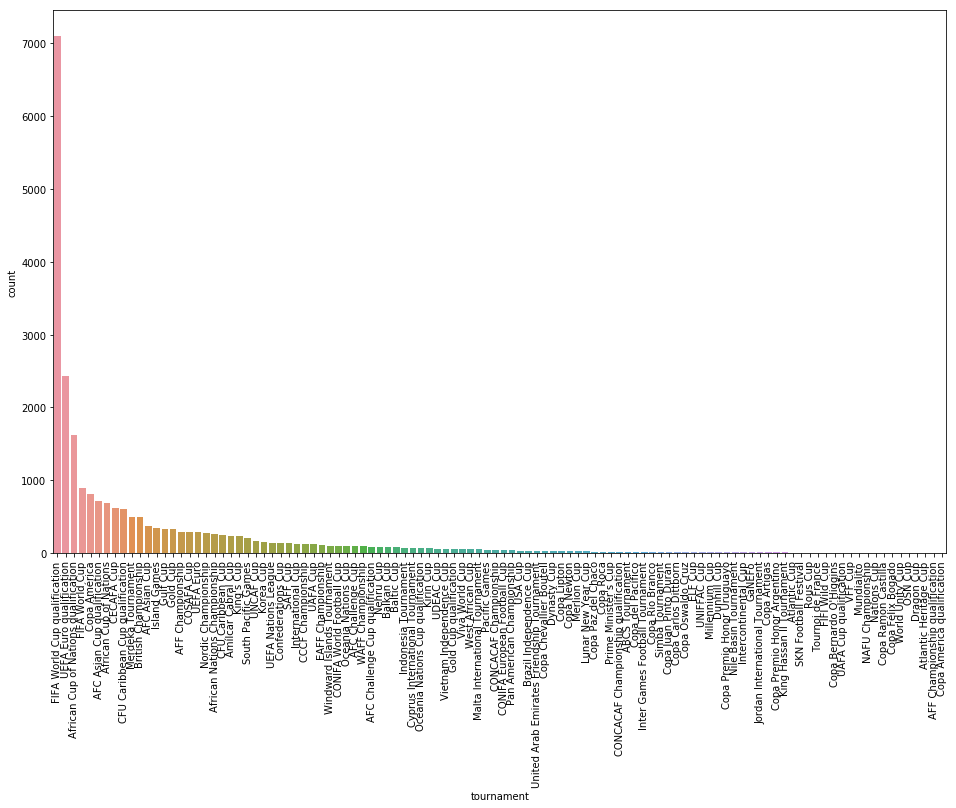

In [17]:
plt.figure(figsize=(16,10))

g = sns.barplot(x='tournament',
            y='count',
            hue=None,
            data=data_football_tournamentCount,
            hue_order=None)

loc, labels = plt.xticks()
g.set_xticklabels(labels, rotation=90)


## Refine the Tournament visualisation above: 

Split into Top 20 tournaments in the First plot, the remainder in the Second Plot

In [18]:
# data_football_tournamentCount.head(20)

[Text(0, 0, 'FIFA World Cup qualification'),
 Text(0, 0, 'UEFA Euro qualification'),
 Text(0, 0, 'African Cup of Nations qualification'),
 Text(0, 0, 'FIFA World Cup'),
 Text(0, 0, 'Copa América'),
 Text(0, 0, 'AFC Asian Cup qualification'),
 Text(0, 0, 'African Cup of Nations'),
 Text(0, 0, 'CECAFA Cup'),
 Text(0, 0, 'CFU Caribbean Cup qualification'),
 Text(0, 0, 'Merdeka Tournament'),
 Text(0, 0, 'British Championship'),
 Text(0, 0, 'AFC Asian Cup'),
 Text(0, 0, 'Island Games'),
 Text(0, 0, 'Gulf Cup'),
 Text(0, 0, 'Gold Cup'),
 Text(0, 0, 'AFF Championship'),
 Text(0, 0, 'COSAFA Cup'),
 Text(0, 0, 'UEFA Euro'),
 Text(0, 0, 'Nordic Championship'),
 Text(0, 0, 'African Nations Championship')]

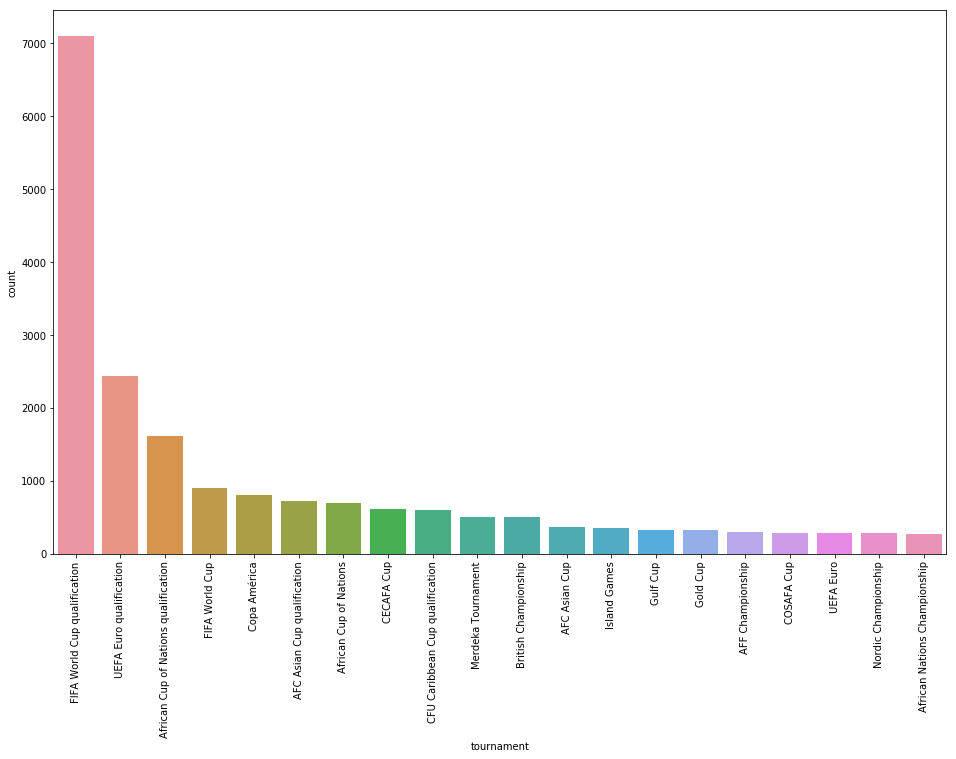

In [19]:
plt.figure(figsize=(16,10))

g = sns.barplot(x='tournament',
            y='count',
            hue=None,
            data=data_football_tournamentCount.head(20),
            hue_order=None)

loc, labels = plt.xticks()
g.set_xticklabels(labels, rotation=90)


[Text(0, 0, 'CFU Caribbean Cup'),
 Text(0, 0, 'Amílcar Cabral Cup'),
 Text(0, 0, "King's Cup"),
 Text(0, 0, 'South Pacific Games'),
 Text(0, 0, 'UNCAF Cup'),
 Text(0, 0, 'Korea Cup'),
 Text(0, 0, 'UEFA Nations League'),
 Text(0, 0, 'Confederations Cup'),
 Text(0, 0, 'SAFF Cup'),
 Text(0, 0, 'International Cup'),
 Text(0, 0, 'CCCF Championship'),
 Text(0, 0, 'UAFA Cup'),
 Text(0, 0, 'EAFF Championship'),
 Text(0, 0, 'Windward Islands Tournament'),
 Text(0, 0, 'CONIFA World Football Cup'),
 Text(0, 0, 'Oceania Nations Cup'),
 Text(0, 0, 'AFC Challenge Cup'),
 Text(0, 0, 'WAFF Championship'),
 Text(0, 0, 'AFC Challenge Cup qualification'),
 Text(0, 0, 'Nehru Cup'),
 Text(0, 0, 'Balkan Cup'),
 Text(0, 0, 'Baltic Cup'),
 Text(0, 0, 'Indonesia Tournament'),
 Text(0, 0, 'Cyprus International Tournament'),
 Text(0, 0, 'Oceania Nations Cup qualification'),
 Text(0, 0, 'Kirin Cup'),
 Text(0, 0, 'UDEAC Cup'),
 Text(0, 0, 'Vietnam Independence Cup'),
 Text(0, 0, 'Gold Cup qualification'),
 Text(0,

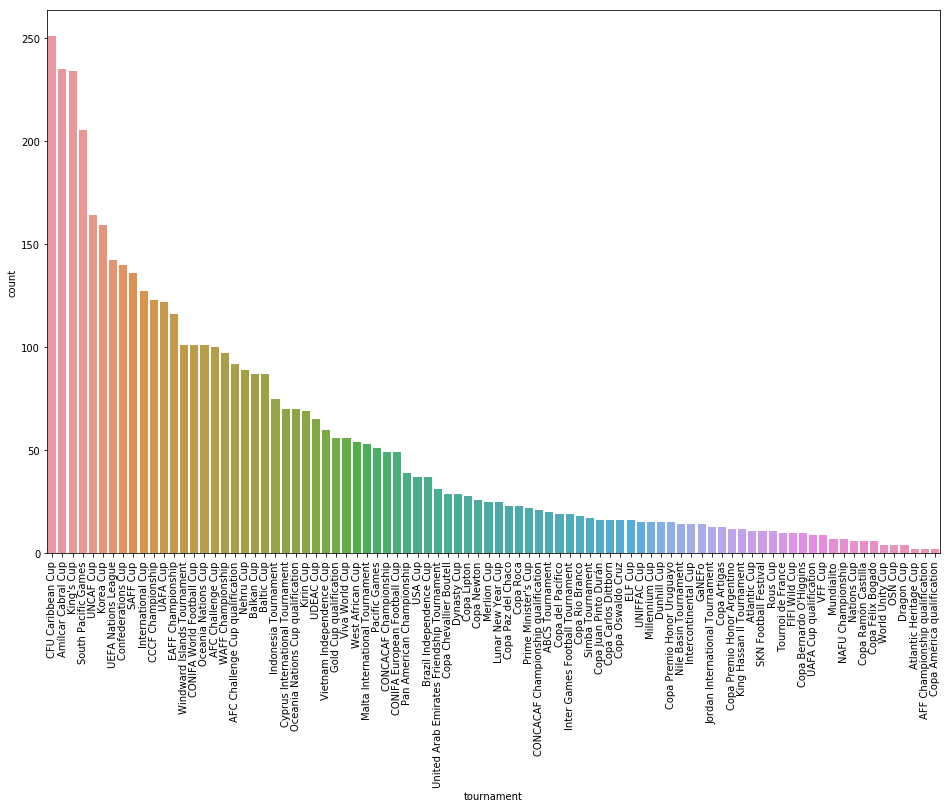

In [20]:
plt.figure(figsize=(16,10))

g = sns.barplot(x='tournament',
            y='count',
            hue=None,
            data=data_football_tournamentCount.tail(88),
            hue_order=None)

loc, labels = plt.xticks()
g.set_xticklabels(labels, rotation=90)


## Create a new column for the scores of each matches:

In [21]:
data_football.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
29,1884-01-26,Northern Ireland,Scotland,0,5,British Championship,Belfast,Republic of Ireland,False
30,1884-02-09,Wales,Northern Ireland,6,0,British Championship,Wrexham,Wales,False
31,1884-02-23,Northern Ireland,England,1,8,British Championship,Belfast,Republic of Ireland,False
32,1884-03-15,Scotland,England,1,0,British Championship,Glasgow,Scotland,False
33,1884-03-17,Wales,England,0,4,British Championship,Wrexham,Wales,False


In [22]:
col_list = ['home_score', 'away_score']

data_football['home_score'].sub(data_football['away_score']).tail()

40834    7
40835    0
40836   -1
40837   -1
40838    0
dtype: int64

In [23]:
data_football['match_scores'] = data_football['home_score'].sub(data_football['away_score'])

In [24]:
data_football.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,match_scores
29,1884-01-26,Northern Ireland,Scotland,0,5,British Championship,Belfast,Republic of Ireland,False,-5
30,1884-02-09,Wales,Northern Ireland,6,0,British Championship,Wrexham,Wales,False,6
31,1884-02-23,Northern Ireland,England,1,8,British Championship,Belfast,Republic of Ireland,False,-7
32,1884-03-15,Scotland,England,1,0,British Championship,Glasgow,Scotland,False,1
33,1884-03-17,Wales,England,0,4,British Championship,Wrexham,Wales,False,-4


In [25]:
data_football.shape

(23928, 10)

## Create a column for the Match Winner:

In [26]:
# Reset the index for the For-loop below:

data_football = data_football.reset_index()

# Drop the previous column that was the index:
data_football = data_football.drop(columns=['index'])


In [27]:
data_football.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,match_scores
0,1884-01-26,Northern Ireland,Scotland,0,5,British Championship,Belfast,Republic of Ireland,False,-5
1,1884-02-09,Wales,Northern Ireland,6,0,British Championship,Wrexham,Wales,False,6
2,1884-02-23,Northern Ireland,England,1,8,British Championship,Belfast,Republic of Ireland,False,-7
3,1884-03-15,Scotland,England,1,0,British Championship,Glasgow,Scotland,False,1
4,1884-03-17,Wales,England,0,4,British Championship,Wrexham,Wales,False,-4


In [28]:
len(data_football)

23928

In [29]:
data_football['winning_team'] = np.nan

list_teamOutcomes = []

for idx in range(len(data_football)):
    print(idx)
    if (data_football['home_score'][idx] > data_football['away_score'][idx]):
        print('home')
        list_teamOutcomes.append('home')

    elif (data_football['home_score'][idx] < data_football['away_score'][idx]):
        print('away')
        list_teamOutcomes.append('away')

    else:
        print('draw')
        list_teamOutcomes.append('draw')

data_football['winning_team'] = list_teamOutcomes

0
away
1
home
2
away
3
home
4
away
5
home
6
home
7
draw
8
home
9
draw
10
away
11
away
12
home
13
away
14
away
15
draw
16
away
17
home
18
home
19
home
20
home
21
home
22
away
23
away
24
home
25
home
26
home
27
away
28
away
29
away
30
home
31
home
32
home
33
away
34
draw
35
away
36
home
37
away
38
away
39
home
40
away
41
draw
42
home
43
home
44
home
45
away
46
home
47
draw
48
away
49
away
50
away
51
home
52
away
53
home
54
home
55
away
56
home
57
home
58
home
59
draw
60
away
61
home
62
away
63
draw
64
home
65
draw
66
draw
67
draw
68
home
69
home
70
home
71
away
72
away
73
home
74
draw
75
home
76
home
77
home
78
draw
79
home
80
home
81
away
82
away
83
away
84
home
85
away
86
away
87
away
88
home
89
home
90
away
91
home
92
home
93
home
94
home
95
home
96
away
97
away
98
draw
99
home
100
home
101
draw
102
home
103
home
104
away
105
draw
106
away
107
away
108
draw
109
home
110
away
111
draw
112
home
113
away
114
away
115
home
116
away
117
draw
118
away
119
draw
120
away
121
draw
122
away
123

In [30]:
data_football.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,match_scores,winning_team
0,1884-01-26,Northern Ireland,Scotland,0,5,British Championship,Belfast,Republic of Ireland,False,-5,away
1,1884-02-09,Wales,Northern Ireland,6,0,British Championship,Wrexham,Wales,False,6,home
2,1884-02-23,Northern Ireland,England,1,8,British Championship,Belfast,Republic of Ireland,False,-7,away
3,1884-03-15,Scotland,England,1,0,British Championship,Glasgow,Scotland,False,1,home
4,1884-03-17,Wales,England,0,4,British Championship,Wrexham,Wales,False,-4,away


In [31]:
data_football.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,match_scores,winning_team
23923,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True,7,home
23924,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True,0,draw
23925,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True,-1,away
23926,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True,-1,away
23927,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True,0,draw


## Checkout the performance of the Teams:

In [32]:
data_football.groupby('winning_team').sum()

,home_score,away_score,neutral,match_scores
winning_team,,,,
away,3629,17915,2696.0,-14286
draw,4513,4513,1749.0,0
home,34505,5687,3482.0,28818


In [33]:
# Create a subset of the data:

data_football_grouped = data_football.groupby('home_team').sum().reset_index()
data_football_grouped

,home_team,home_score,away_score,neutral,match_scores
0,Abkhazia,35,10,12.0,25
1,Afghanistan,38,48,26.0,-10
2,Albania,106,151,10.0,-45
3,Alderney,5,27,7.0,-22
4,Algeria,278,115,55.0,163
5,American Samoa,24,140,24.0,-116
6,Andorra,17,143,8.0,-126
7,Angola,166,80,19.0,86
8,Anguilla,9,32,5.0,-23
9,Antigua and Barbuda,109,100,26.0,9


In [34]:
data_football_grouped_sorted = data_football_grouped.sort_values('match_scores', ascending=False)
data_football_grouped_sorted

,home_team,home_score,away_score,neutral,match_scores
33,Brazil,851,308,192.0,543
11,Argentina,879,347,179.0,532
239,South Korea,690,217,144.0,473
78,England,706,242,46.0,464
15,Australia,457,103,51.0,354
96,Germany,527,175,87.0,352
162,Mexico,525,178,110.0,347
242,Spain,450,105,43.0,345
173,Netherlands,434,109,44.0,325
247,Sweden,522,211,31.0,311


## Group by Tournament Experience to get Ranking:

### Create New dictionary code to fill each tournament with the team rankings:

In [35]:
# Sort by Tournament:

tournament_list = list(data_football['tournament'].unique())

data_football_tournamentTypes = {}

data_football_tournamentTypes_rankedTop5 = {}

for i, j in enumerate(tournament_list):
    
    
    data_football_tournamentTypes[i] = data_football[data_football['tournament']== j].iloc[:,[0,1,2,3,4,5,6,7,9,10]]
    data_football_tournamentTypes_subset = data_football_tournamentTypes[i].groupby('home_team').sum()
    data_football_tournamentTypes_subset['tournament'] = data_football[data_football['tournament']== j].iloc[len(data_football_tournamentTypes_subset)-1,5]
    
    data_football_tournamentTypes_subset_top5 = data_football_tournamentTypes_subset.sort_values('match_scores', ascending=False).head(5)
    
    data_football_tournamentTypes_rankedTop5[i] = data_football_tournamentTypes_subset_top5
    data_football_tournamentTypes_rankedTop5[i] = data_football_tournamentTypes_rankedTop5[i].reset_index()
    

In [36]:
data_football_tournamentTypes_rankedTop5[50]

,home_team,home_score,away_score,match_scores,tournament
0,Martinique,97,21,76,CFU Caribbean Cup qualification
1,Cuba,84,10,74,CFU Caribbean Cup qualification
2,Haiti,83,17,66,CFU Caribbean Cup qualification
3,Trinidad and Tobago,77,22,55,CFU Caribbean Cup qualification
4,Jamaica,70,18,52,CFU Caribbean Cup qualification


In [37]:
data_football_tournamentTypes_rankedTop5[49]

,home_team,home_score,away_score,match_scores,tournament
0,Japan,69,37,32,Kirin Cup
1,Serbia,2,0,2,Kirin Cup
2,Paraguay,2,0,2,Kirin Cup
3,Colombia,1,0,1,Kirin Cup
4,Argentina,1,0,1,Kirin Cup


In [38]:
data_football_tournamentTypes_rankedTop5[0]

,home_team,home_score,away_score,match_scores,tournament
0,England,342,135,207,British Championship
1,Scotland,287,128,159,British Championship
2,Wales,193,229,-36,British Championship
3,Northern Ireland,151,299,-148,British Championship


In [39]:
len(data_football_tournamentTypes_rankedTop5)

108

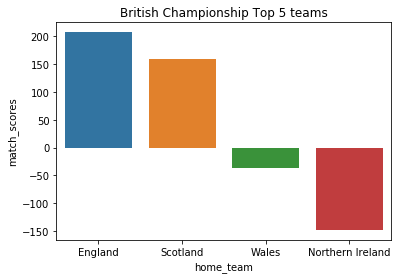

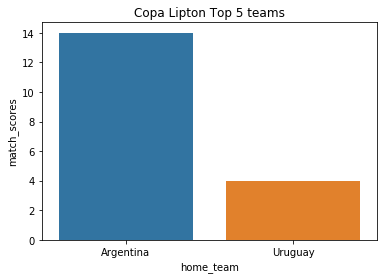

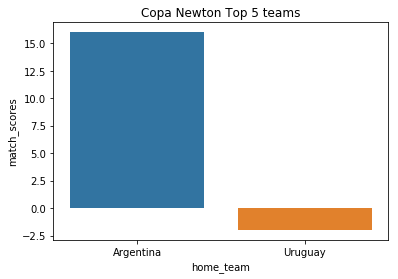

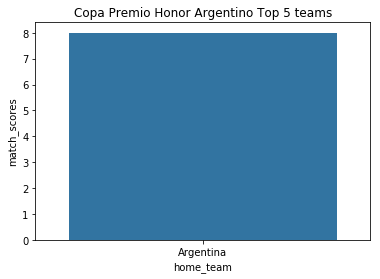

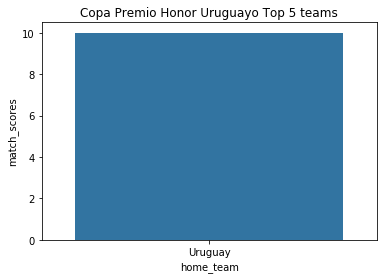

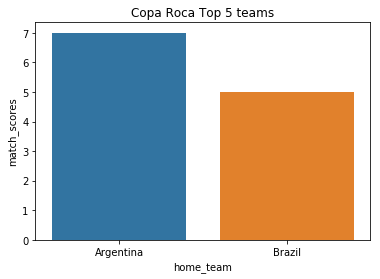

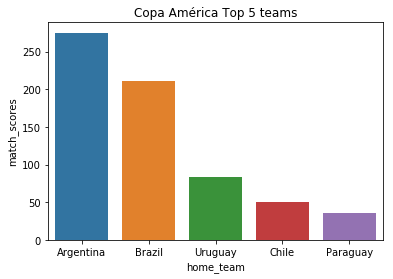

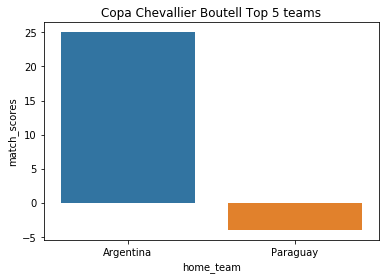

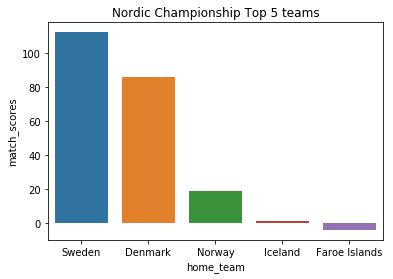

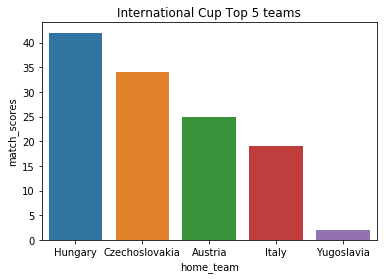

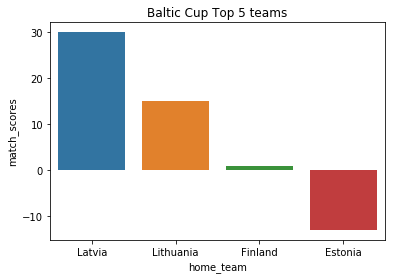

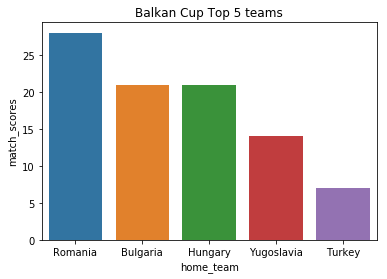

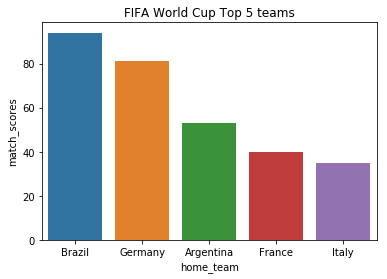

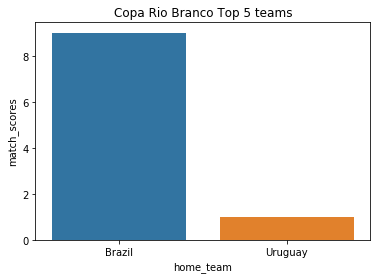

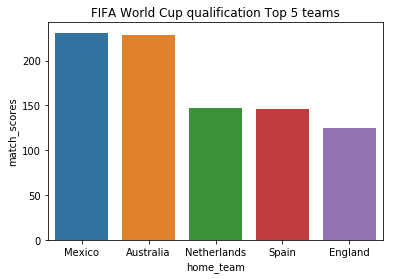

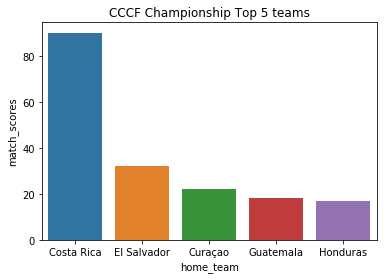

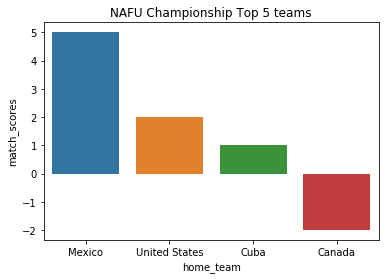

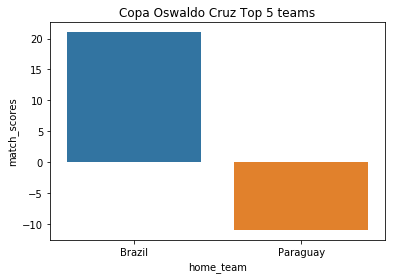

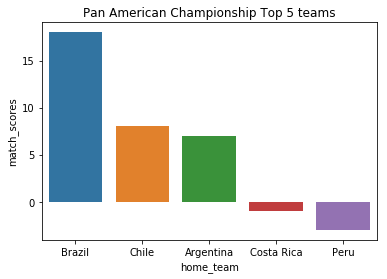

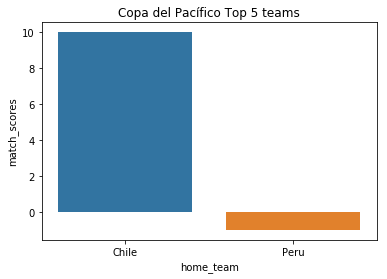

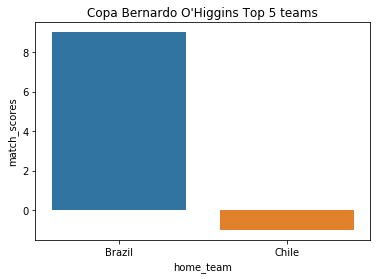

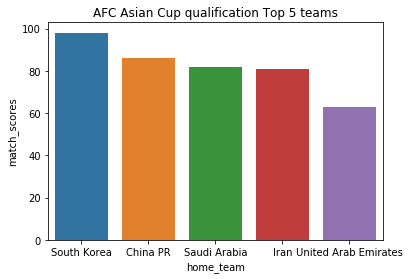

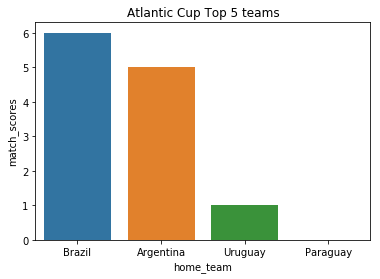

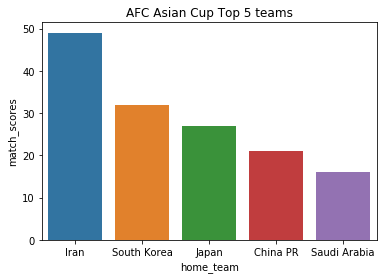

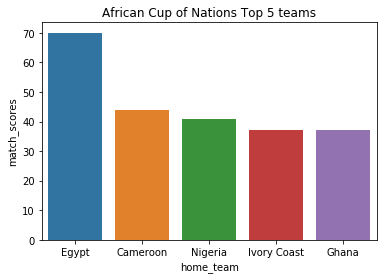

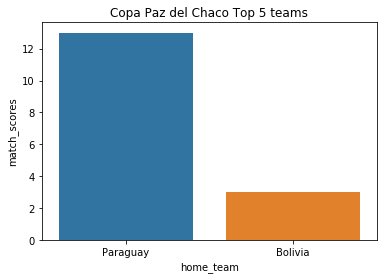

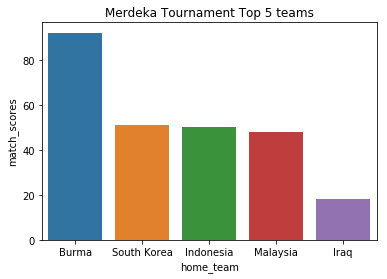

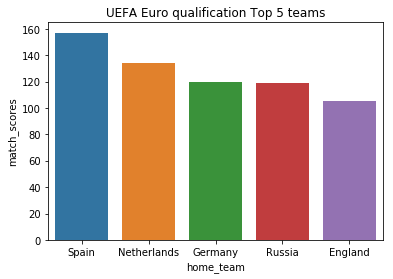

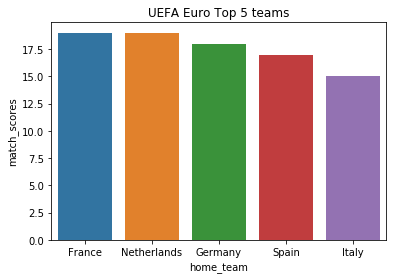

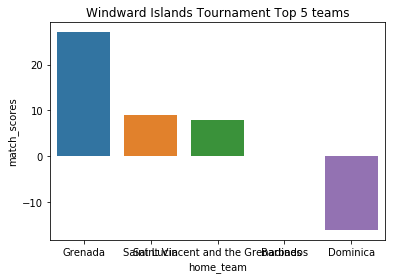

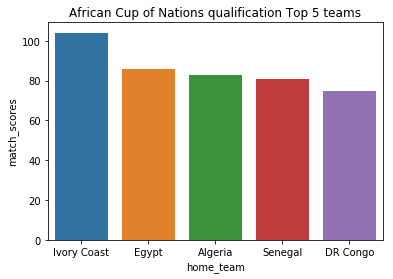

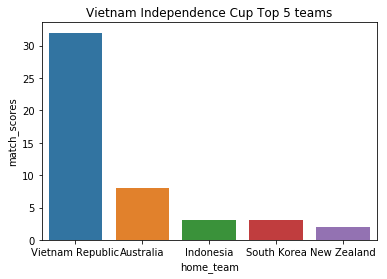

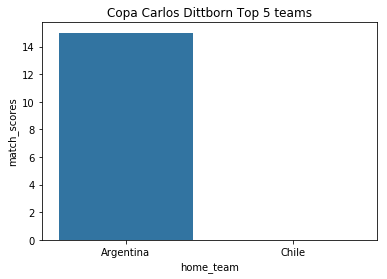

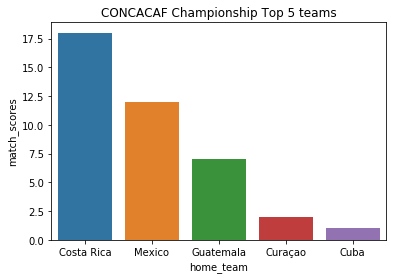

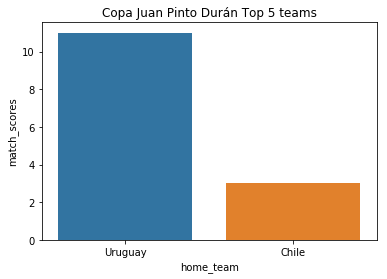

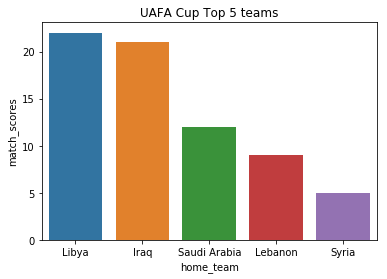

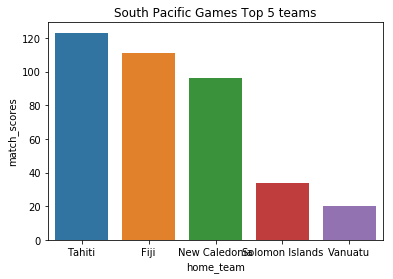

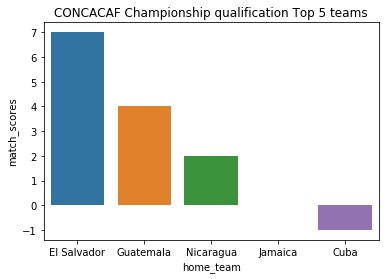

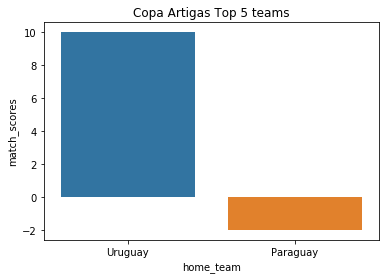

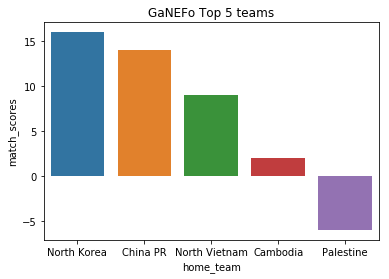

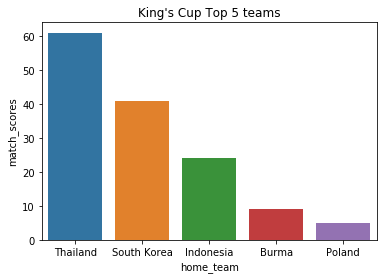

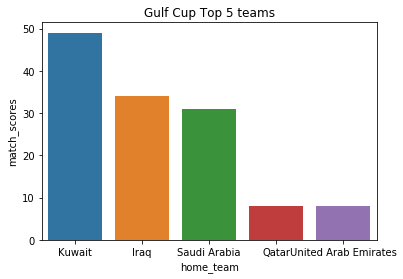

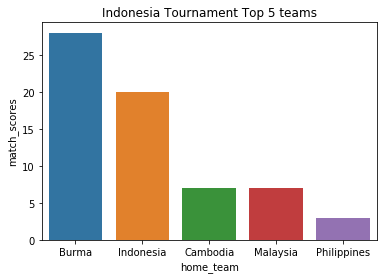

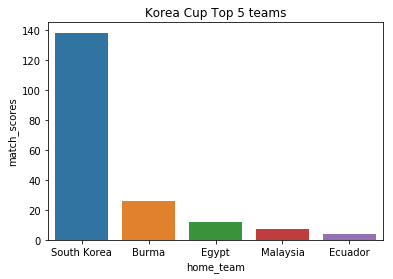

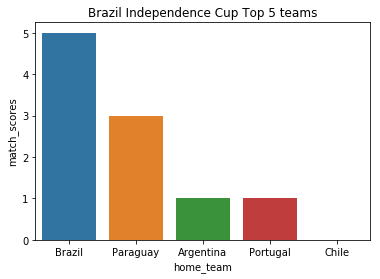

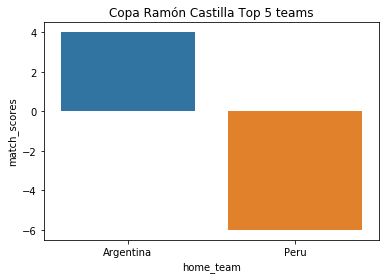

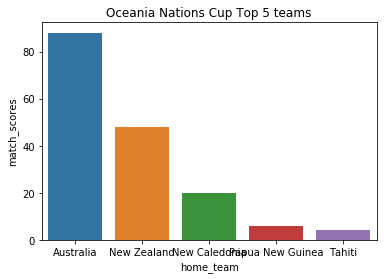

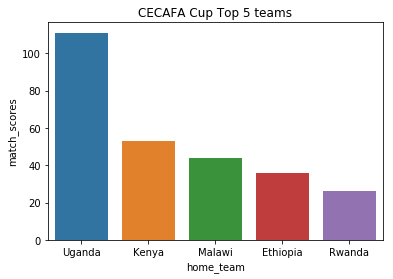

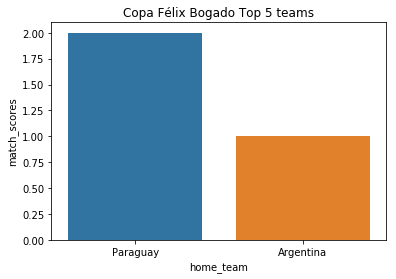

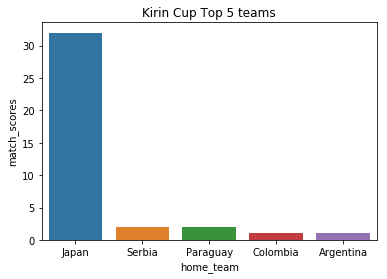

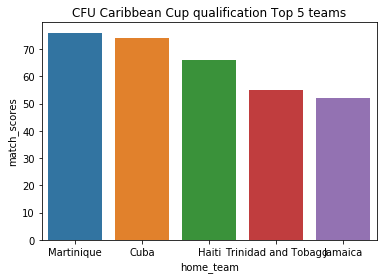

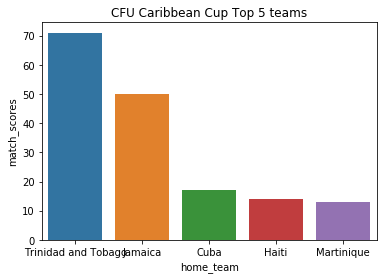

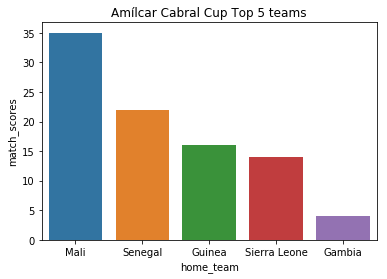

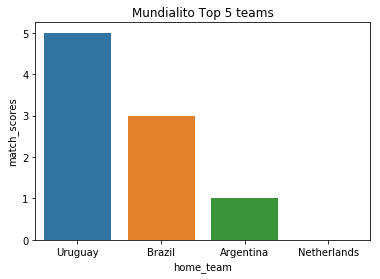

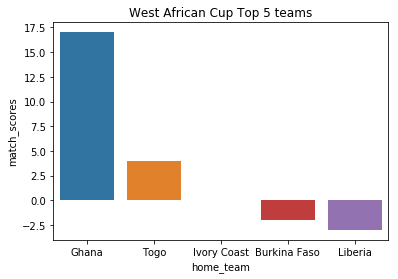

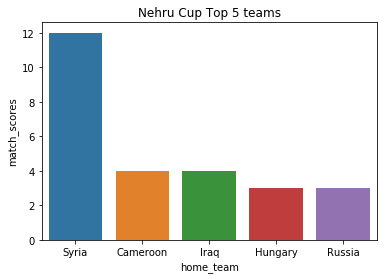

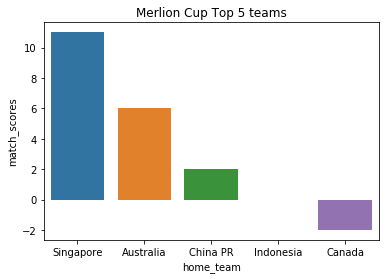

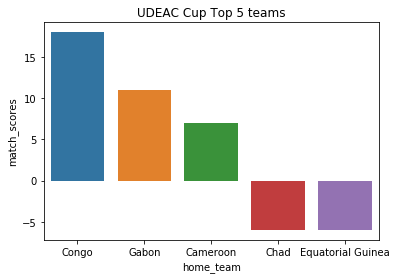

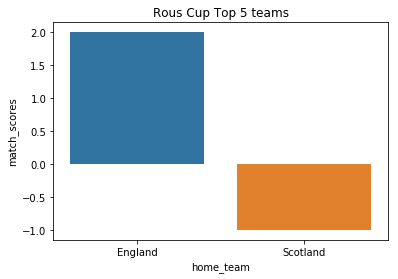

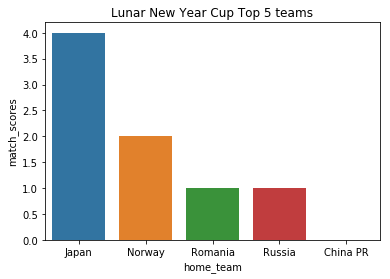

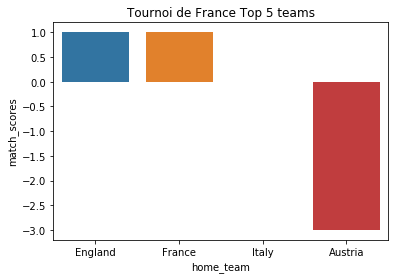

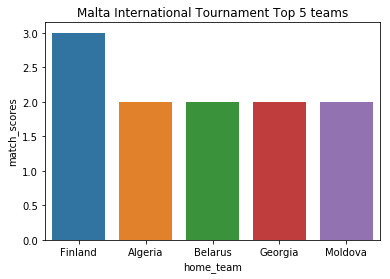

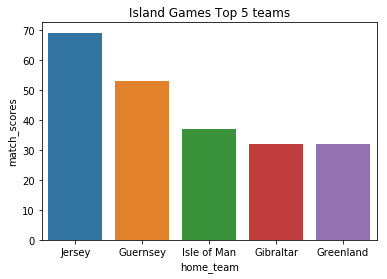

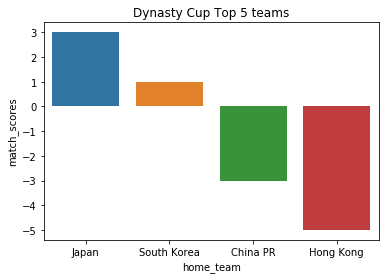

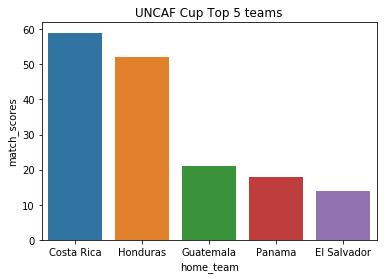

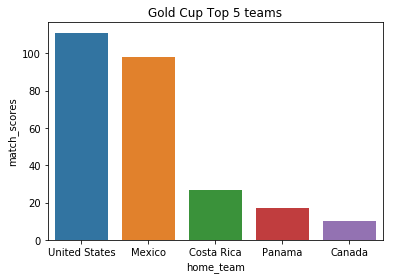

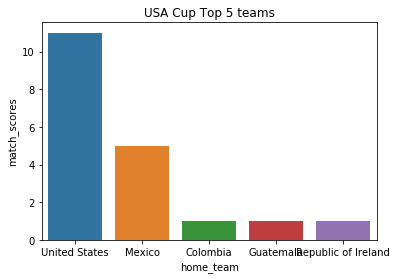

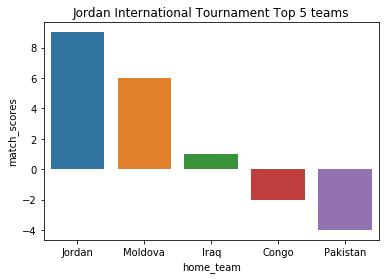

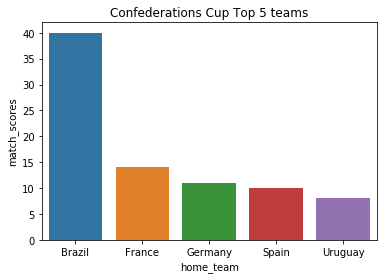

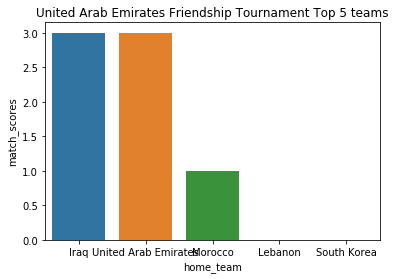

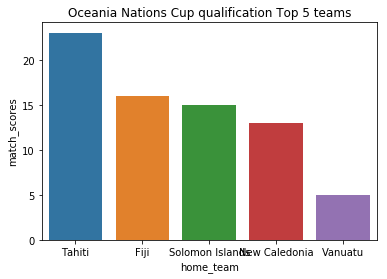

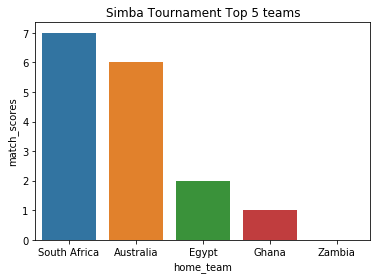

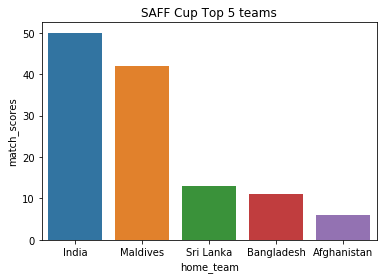

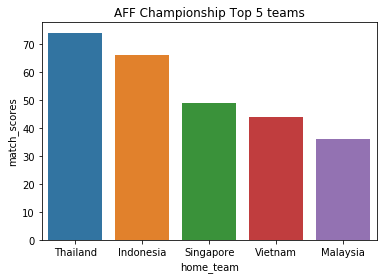

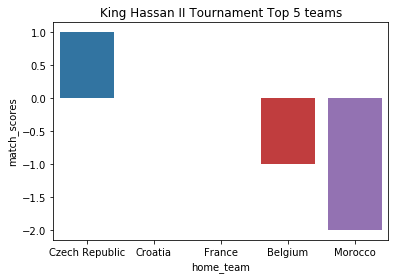

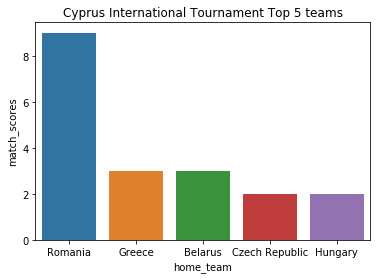

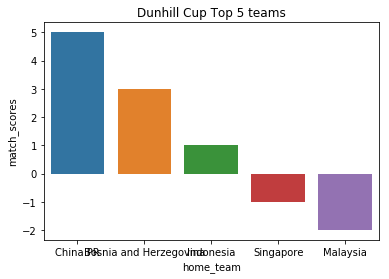

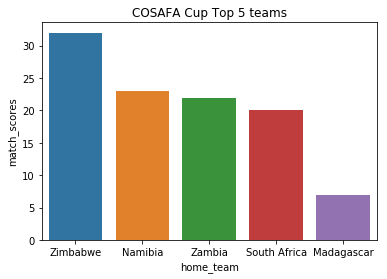

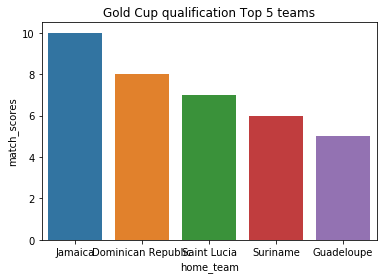

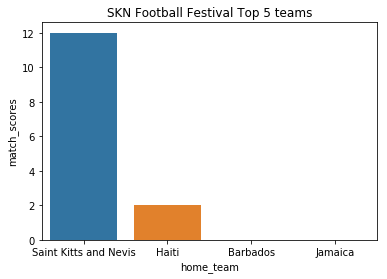

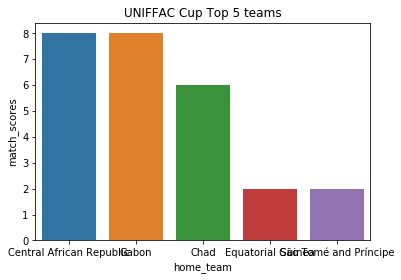

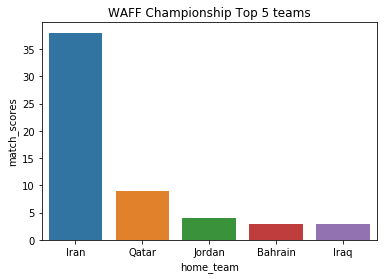

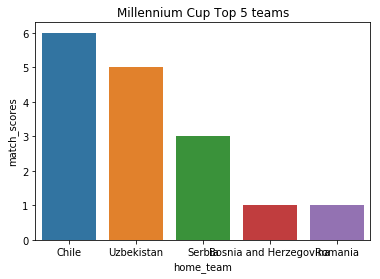

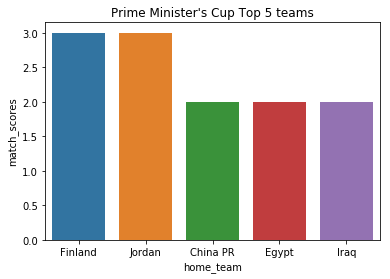

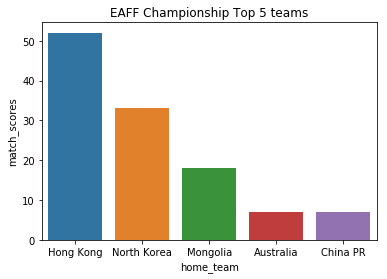

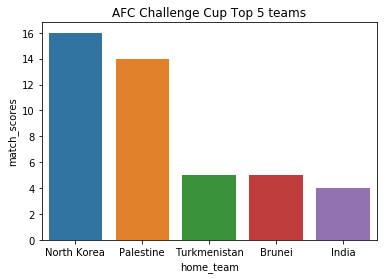

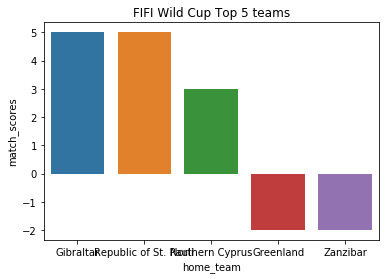

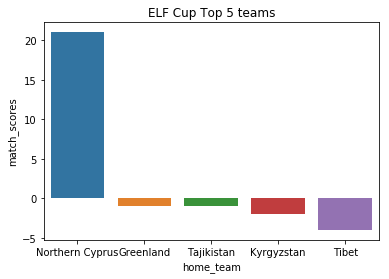

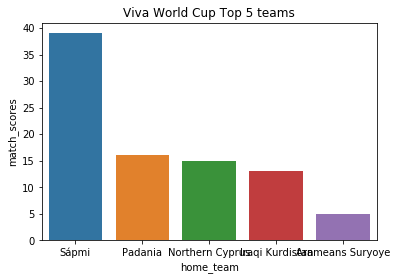

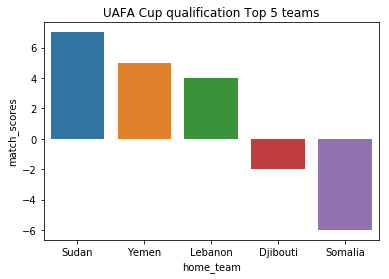

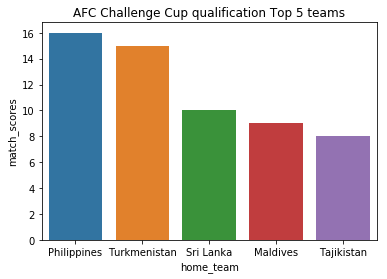

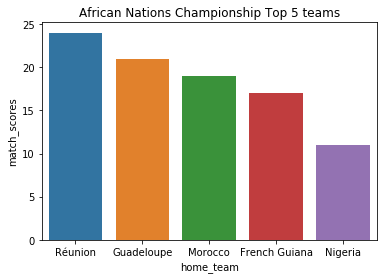

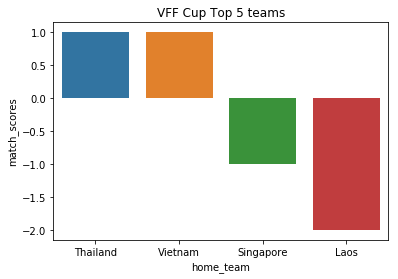

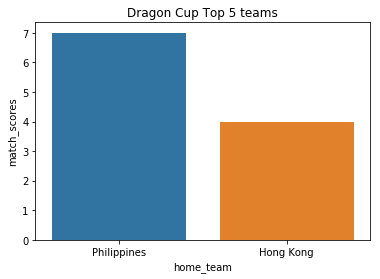

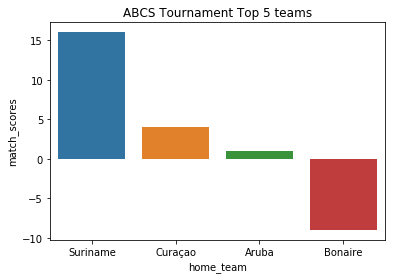

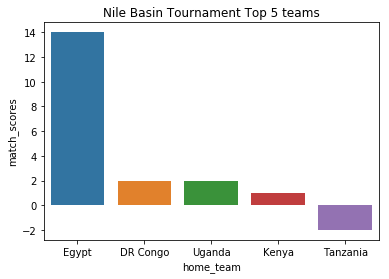

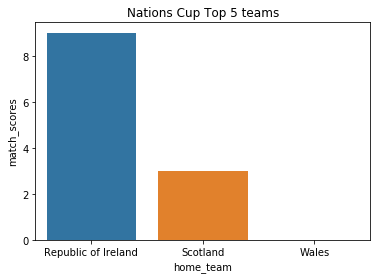

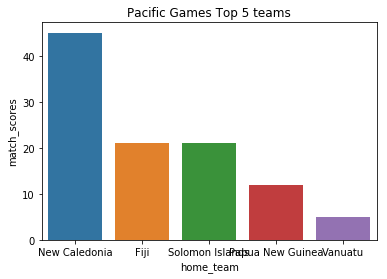

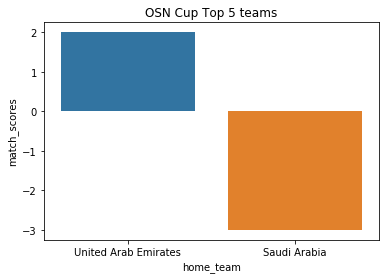

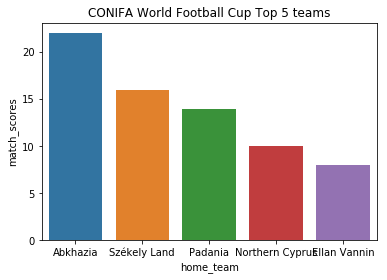

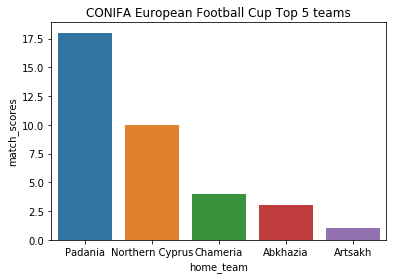

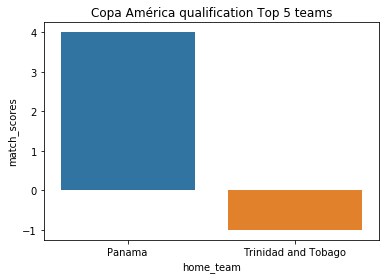

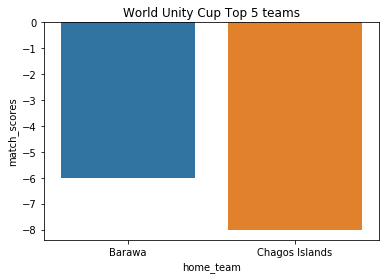

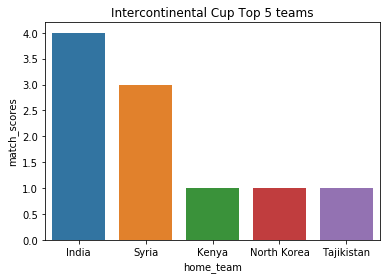

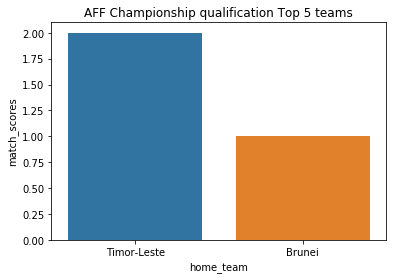

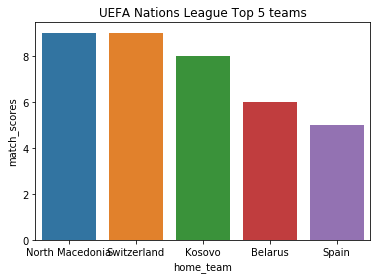

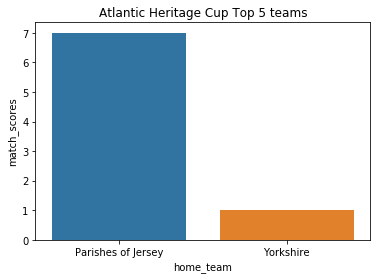

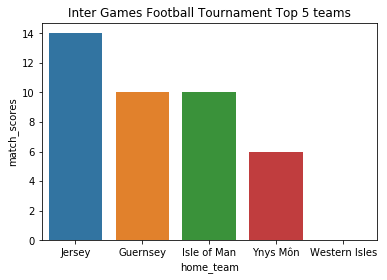

In [45]:
# Plot:

categorical = list(data_football['tournament'].unique())

# fig, ax = plt.subplots(len(categorical),1, figsize=(16, (len(categorical)*3)))


for i, x_plots in enumerate(categorical):
    
    df_temp = data_football_tournamentTypes_rankedTop5[i]
    plt.figure(i)
    plt.title(str(x_plots) + " " + str('Top 5 teams'))
    sns.barplot(x='home_team',
                y='match_scores',
                data=data_football_tournamentTypes_rankedTop5[i])

# Add Overall Plot title:
# fig.suptitle('Top 5 Ranking Teams in each Tournament')

In [47]:
# data_football_tournamentTypes_rankedTop5

### Observations:

As it can be seen from the charts above, each plotted the Top 5 winning teams for each of the tournaments played. These charts also show the ranking of the teams.

## Find the overall champion based on the most matches won:

In [ ]:
champions = {}



In [98]:
data_football_tournamentTypes_rankedTop5[0]

,home_team,home_score,away_score,match_scores,tournament
0,England,342,135,207,British Championship
1,Scotland,287,128,159,British Championship
2,Wales,193,229,-36,British Championship
3,Northern Ireland,151,299,-148,British Championship


In [99]:
data_football_tournamentTypes_rankedTop5[1]

,home_team,home_score,away_score,match_scores,tournament
0,Argentina,26,12,14,Copa Lipton
1,Uruguay,17,13,4,Copa Lipton


In [79]:
data_football_tournamentTypes_rankedTop5[0][['home_team']]

,home_team
0,England
1,Scotland
2,Wales
3,Northern Ireland


In [77]:
type(data_football_tournamentTypes_rankedTop5[0][['home_team']])

pandas.core.frame.DataFrame

In [80]:
data_football_tournamentTypes_rankedTop5[0]

,home_team,home_score,away_score,match_scores,tournament
0,England,342,135,207,British Championship
1,Scotland,287,128,159,British Championship
2,Wales,193,229,-36,British Championship
3,Northern Ireland,151,299,-148,British Championship


In [106]:
categorical = list(data_football['tournament'].unique())

champion_df = pd.DataFrame()

for i in range(len(categorical)):
    champion_df = champion_df.append(data_football_tournamentTypes_rankedTop5[i], ignore_index = True)

In [107]:
champion_df

,home_team,home_score,away_score,match_scores,tournament
0,England,342,135,207,British Championship
1,Scotland,287,128,159,British Championship
2,Wales,193,229,-36,British Championship
3,Northern Ireland,151,299,-148,British Championship
4,Argentina,26,12,14,Copa Lipton
5,Uruguay,17,13,4,Copa Lipton
6,Argentina,31,15,16,Copa Newton
7,Uruguay,17,19,-2,Copa Newton
8,Argentina,21,13,8,Copa Premio Honor Argentino
9,Uruguay,26,16,10,Copa Premio Honor Uruguayo


In [90]:
type(champion_df)

pandas.core.frame.DataFrame

In [86]:
range(len(categorical)-1)

range(0, 107)

## Need to include country column:

## Average Ranking: Rank the Home teams by average wins

In [ ]:
data_football.head()

In [ ]:
data_football.shape, data_football.shape[0]

In [ ]:
totalMatches = data_football.shape[0]
totalMatches

In [ ]:
data_football[data_football['home_team'] == "Abkhazia"]

In [ ]:
data_football[data_football['home_team'] == "Abkhazia"]['date'].count()

In [ ]:
# teamName = []

# totalMatches_HomeTeam = data_football[data_football['home_team'] == teamName]['date'].count()

In [ ]:
data_football_groupedBy_HomeTeam = data_football.groupby('home_team').sum()

In [ ]:
data_football_groupedBy_HomeTeam.head()

In [ ]:
data_football_groupedBy_HomeTeam['win_ratio'] = data_football_groupedBy_HomeTeam['home_score']/(data_football_groupedBy_HomeTeam['home_score'] + data_football_groupedBy_HomeTeam['away_score'])

In [ ]:
data_football_groupedBy_HomeTeam['loose_ratio'] = data_football_groupedBy_HomeTeam['away_score']/(data_football_groupedBy_HomeTeam['home_score'] + data_football_groupedBy_HomeTeam['away_score'])

In [ ]:
data_football_groupedBy_HomeTeam.head()

In [ ]:
# data_football_groupedBy_HomeTeam['weighted_MatchScores'] = data_football_groupedBy_HomeTeam['win_ratio'] * (data_football_groupedBy_HomeTeam['home_score'] + data_football_groupedBy_HomeTeam['away_score'])

In [ ]:
# data_football_groupedBy_HomeTeam['average_MatchScores'] * data_football_groupedBy_HomeTeam['match_scores']

In [ ]:
data_football_groupedBy_HomeTeam.sort_values('win_ratio', ascending=False)

# Save the output into CSV format:

In [ ]:
# IGNORE THIS ONE: better method of saving is in the next chunk of code.

# # path_directory
# data_football_grouped.to_csv(path_directory, 'football_task1', sep='\t')

In [ ]:
# USE THIS ONE:

import os
# data_football_grouped_sorted.to_csv(os.path.join(path_directory, r'football_task1_sorted.csv'))
# data_football_grouped.to_csv(os.path.join(path_directory, r'football_task1.csv'))

In [ ]:
# data_football_grouped_sorted.to_csv(os.path.join(path_directory, r'football_task1_sorted.csv'))

## Backup codes:

In [ ]:
# # Plot:

# categorical = list(data_football['tournament'].unique())

# # categorical = ['British Championship', 'Copa Lipton', 'Copa Newton']


# # fig, ax = plt.subplots(len(data_football_tournamentTypes_rankedTop5),1, figsize=(16, 25))
# # fig, ax = plt.subplots(len(categorical),1, figsize=(16, len(categorical)))

# fig, ax = plt.subplots(len(categorical),1, figsize=(16, (len(categorical)*3)))



# for i, (tournament_name, subplot) in enumerate(zip(categorical, ax.flatten())):
#     plt.figure(i)
#     fig.subplots_adjust(hspace=.5)
# #     sns.barplot(x='home_team',
# #                 y='match_scores',
# #                 data=data_football_tournamentTypes_rankedTop5[i]).set(xlabel='Home Teams', ylabel='Match Scores')
#     sns.countplot(x='home_team',
#                   y='match_scores',
#                   data=data_football_tournamentTypes_rankedTop5[i])
    
#     # Add Suplot Titles:
#     ax[i].set_title(tournament_name) 



# # Add Overall Plot title:
# fig.suptitle('Top 5 Ranking Teams in each Tournament') 